In [1]:
import pandas as pd
import numpy as np
import glob
import re

In [2]:
df = pd.read_csv('station_belem.csv')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1961,26.43,25.53,25.88,26.07,26.31,26.64,26.77,26.72,26.62,26.46,26.50,26.51,26.19,26.09,26.71,26.53,26.38
1,1962,26.30,26.06,26.15,26.04,26.83,26.74,26.71,26.94,26.87,26.80,26.68,26.91,26.29,26.34,26.80,26.78,26.55
2,1963,26.25,26.03,26.02,26.42,27.17,26.94,26.93,26.98,26.96,26.85,27.06,26.24,26.40,26.54,26.95,26.96,26.71
3,1964,25.70,25.52,25.41,25.75,26.55,26.91,27.16,27.34,27.32,999.90,999.90,999.90,25.82,25.90,27.14,999.90,26.39
4,1965,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90


In [3]:
def read_csv_temperatures(csv_file):
    city = re.findall("^station_(.+).csv$", csv_file)[0]
    df = pd.read_csv(csv_file)
    new_df = pd.DataFrame({'date': [], 'mean_temperature': [], 'city': []})

    months_num_dict = {month: num for month, num in zip(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], range(1, 13))}
    for idx, row in df.iterrows():
        for column in df.columns:
            if column not in months_num_dict.keys():
                continue
            date = f"{str(int(row['YEAR']))}-{months_num_dict[column]}"
            new_df = new_df.append({'date': date, 'mean_temperature': float(row[column]), 'city': city}, ignore_index=True)
    return new_df

dfs = []
for csv_file in glob.glob('*.csv'):
    dfs.append(read_csv_temperatures(csv_file))
final_df = pd.concat(dfs)

In [4]:
final_df.head()

,date,mean_temperature,city
0,1961-1,26.43,belem
1,1961-2,25.53,belem
2,1961-3,25.88,belem
3,1961-4,26.07,belem
4,1961-5,26.31,belem


In [5]:
final_df.describe()

,mean_temperature
count,9084.000000
mean,161.505203
std,338.184587
min,12.080000
25%,24.100000
50%,26.620000
75%,28.100000
max,999.900000


In [6]:
final_df

,date,mean_temperature,city
0,1961-1,26.43,belem
1,1961-2,25.53,belem
2,1961-3,25.88,belem
3,1961-4,26.07,belem
4,1961-5,26.31,belem
...,...,...,...
703,2019-8,23.05,vitoria
704,2019-9,24.95,vitoria
705,2019-10,25.90,vitoria
706,2019-11,999.90,vitoria


In [7]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

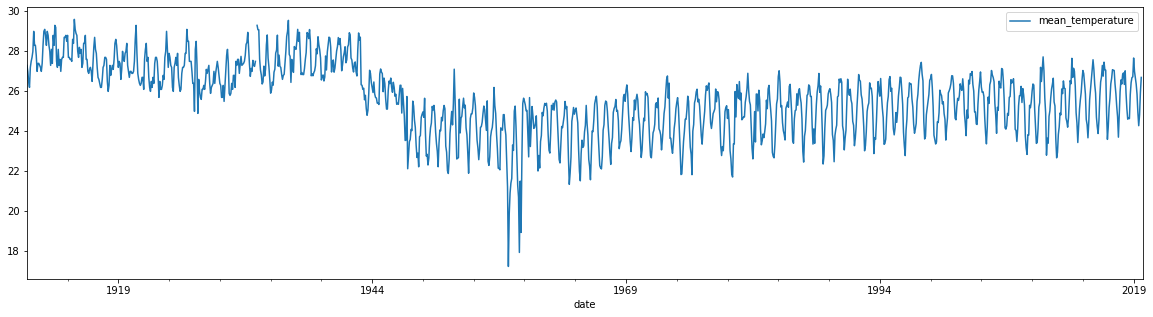

In [10]:
final_df.loc[final_df['mean_temperature'] > 100, 'mean_temperature'] = np.nan
final_df.groupby(final_df.index).mean().plot(figsize=(20, 5))

<AxesSubplot:xlabel='date'>

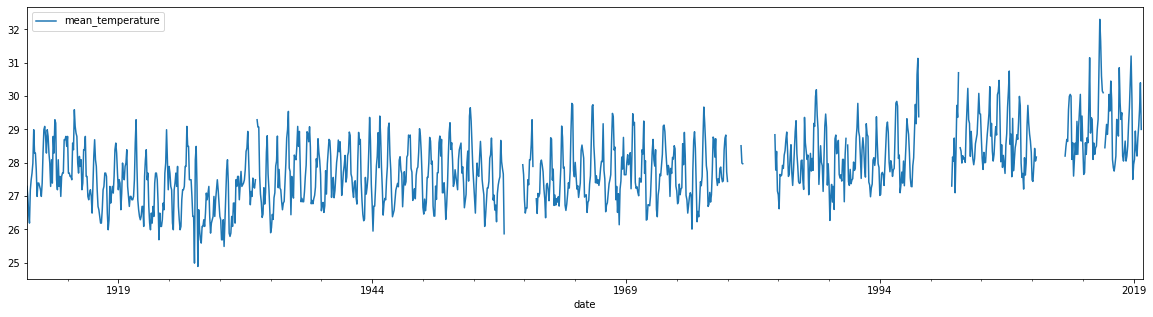

In [13]:
final_df[final_df['city'] == 'manaus'].plot(figsize=(20, 5))

In [12]:
final_df.to_csv('../brazil_temperatures.csv')

In [12]:
sp = final_df[final_df['city'] == 'sao_paulo']
sp['date'] = pd.to_datetime(sp['date'])
sp.set_index('date', inplace=True)

C:\Users\denis\AppData\Local\Temp/ipykernel_19884/426217272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp['date'] = pd.to_datetime(sp['date'])


In [13]:
sp

,mean_temperature,city
date,,
1946-01-01,999.90,sao_paulo
1946-02-01,999.90,sao_paulo
1946-03-01,999.90,sao_paulo
1946-04-01,999.90,sao_paulo
1946-05-01,999.90,sao_paulo
...,...,...
2019-08-01,18.80,sao_paulo
2019-09-01,20.85,sao_paulo
2019-10-01,23.45,sao_paulo


c:\users\denis\miniconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:xlabel='date'>

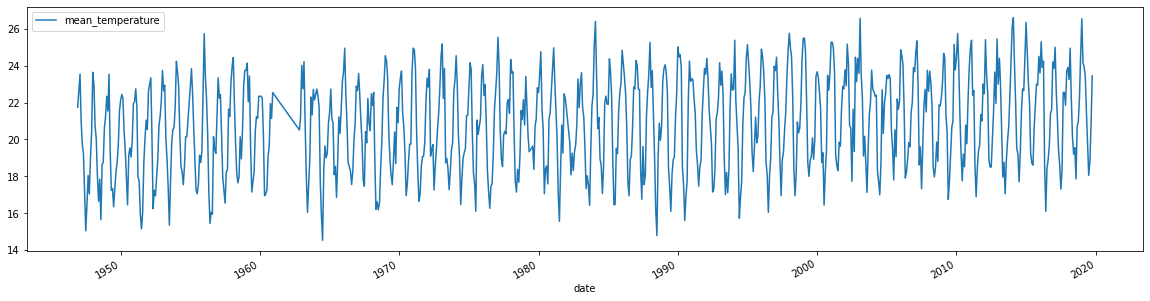

In [42]:
sp.loc[sp['mean_temperature'] > 100, 'mean_temperature'] = np.nan
sp.dropna().plot(figsize=(20,5))

In [32]:
sp.loc[sp['mean_temperature'] > 100, 'mean_temperature']

Series([], Name: mean_temperature, dtype: float64)

In [26]:
sp['mean_temperature'] = sp[sp['mean_temperature'] if sp['mean_temperature'] < 100 else np.nan]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [27]:
sp[sp['mean_temperature'] if sp['mean_temperature'] < 100 else np.nan]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().